In [1]:
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return (2 + 4) * y ** ((2 + 3) / (2 + 4))

In [3]:
def exact_solution(x):
    return x**(2+4)

In [4]:
def rk4(x0, y0, h, n):
    x = [0] * (n + 1)
    y = [0] * (n + 1)
    local_errors = [0] * (n + 1)
    local_erros_rk=[0] * (n+1)
    x[0] = x0
    y[0] = y0

    for i in range(1, n + 1):
        k1 = h * f(x[i - 1], y[i - 1])
        k2 = h * f(x[i - 1] + h/2, y[i - 1] + k1/2)
        k3 = h * f(x[i - 1] + h/2, y[i - 1] + k2/2)
        k4 = h * f(x[i - 1] + h, y[i - 1] + k3)

        x[i] = x[i - 1] + h
        y[i] = y[i - 1] + (k1 + 2*k2 + 2*k3 + k4)/6

        local_errors[i] = abs(y[i] - exact_solution(x[i]))
        local_erros_rk[i]=abs(((15/16)*((y[i])**h/2)-((y[i])**h)))

    return x, y, local_errors,local_erros_rk

In [5]:
def print_results(x, y, local_errors):
    print("x:", x)
    print("y:", y)
    print("Local Errors:", local_errors)

In [6]:
a = 1
b = 3
y0 = 1
h=0.001
n = int((b - a) / h)
errors = []
hh=[]

In [7]:
while h < 0.01:
  xx,y,local_errors,local_errors_rkk = rk4(a,y0,h,n)
  errors_def = local_errors_rkk[-1]-local_errors_rkk[1]
  errors.append(errors_def)
  hh.append(h)
  h = h+0.0001

In [8]:
min_error=min(errors)
optimal_step_index = errors.index(min_error)
optimal_step = hh[optimal_step_index]
h=optimal_step
n = int((b - a) / h)
x,y,local_errors,local_errors_rk=rk4(a,y0,h,n)

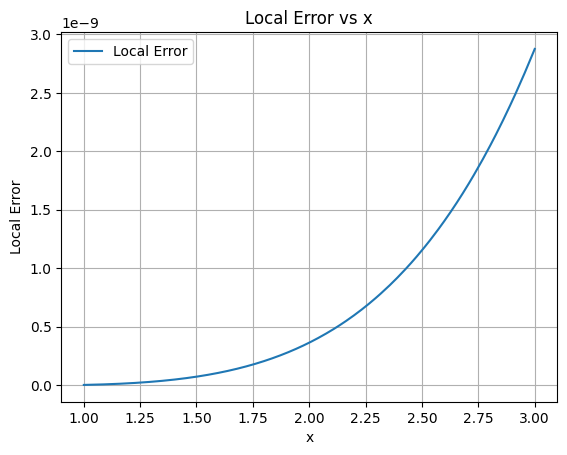

In [9]:
plt.plot(x[1:], local_errors[1:], label='Local Error')
plt.xlabel('x')
plt.ylabel('Local Error')
plt.title('Local Error vs x')
plt.legend()
plt.grid(True)
plt.show()

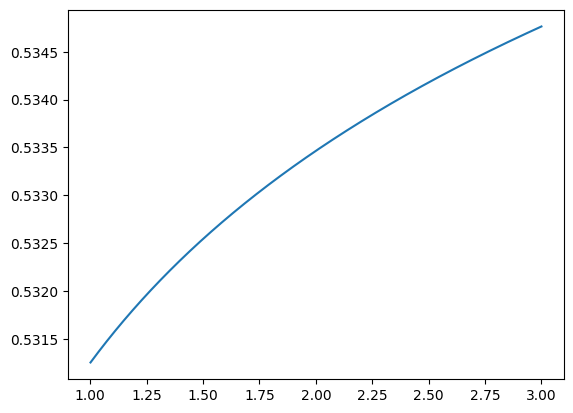

In [10]:
plt.plot(x[1:], local_errors_rk[1:],label='Local Error Runge Krutta')
plt.show()

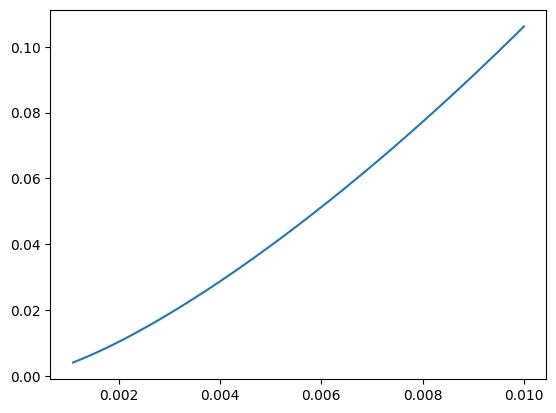

In [11]:
plt.plot(hh[1:], errors[1:],label='Step to errors')
plt.show()